In [2]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import nltk
from nltk.collocations import *
import re
import itertools # For sorting list and removing duplicates
from sklearn.feature_extraction.text import TfidfVectorizer
import os

textList = []
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        myfile = os.path.join(dirname, filename)
        with open(myfile, 'rb') as fopen:
            q = fopen.read().decode('ISO-8859-1')
            textList.append(q)

In [4]:
df = pd.DataFrame(textList)
df

,0
0,IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1,IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2,"CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC..."
3,Vol. I 1931 THE Indian Journal of Veterinary S...
4,"IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI..."
...,...
463,[NLS note: a graphic appears here - see image ...
464,REPORT ON THE WORKING OF THE MENTAL HOSPITALS ...
465,ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...
466,SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...


In [5]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

In [6]:
df.columns = ['text']
df.head()

,text
0,IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1,IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2,"CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC..."
3,Vol. I 1931 THE Indian Journal of Veterinary S...
4,"IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI..."


In [7]:
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df['text'] = cleandf['text']
df

,text
0,ipqb10 m91b no 44 new series scientific memoir...
1,ip6hgs4 report on the calcutta medical institu...
2,cholera in india 1862 to 1881 bengal province ...
3,vol i 1931 the indian journal of veterinary sc...
4,ipqb 10 m91b no 19 new series scientific memoi...
...,...
463,nls note a graphic appears here see image of ...
464,report on the working of the mental hospitals ...
465,icar 15 viii 650 vol viii 1938 the indian jour...
466,sleeping sickness a summary of the work done b...


In [8]:
arr = df["text"].to_numpy()
arr = arr.tolist()

In [9]:
tfidf = TfidfVectorizer(stop_words='english')

In [10]:
def get_top_tf_idf_words(response, top_n=3):
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

In [11]:
corpus = arr
corpusLen = len(corpus)
trainingLen = corpusLen * 0.2 # Train it on 20% of the text items
trainingLen = int(trainingLen)
trainArr = corpus[:trainingLen] # First 20% of corpus
restArr = corpus[-(len(corpus)-trainingLen-4):] # Last 80% of corpus
X = tfidf.fit_transform(trainArr)
feature_names = np.array(tfidf.get_feature_names())
responses = tfidf.transform(restArr)
resultsArr = [get_top_tf_idf_words(response,4) for response in responses]
finalArr = [l.tolist() for l in resultsArr]

In [12]:
allWords = []
for item in finalArr:
    print(item)
    allWords = allWords + item

['vaccination', '10', 'total', '11']
['acidfast', 'streptothrix', 'ims', 'captain']
['plague', 'shall', 'railway', 'officer']
['venom', 'serum', 'snake', 'cobra']
['herpetomonas', 'flagellates', 'fig', 'parasites']
['regiment', 'army', 'sketch', 'detachment']
['asylums', 'burma', 'lunatic', 'males']
['women', 'soldiers', 'lockhospital', 'disease']
['intestine', 'species', 'worms', 'parasites']
['veterinary', 'year', 'rs', 'total']
['elephants', 'treatise', 'elephant', 'animal']
['milk', 'ghee', 'cent', 'animals']
['plague', 'shall', 'officer', 'collector']
['veterinary', 'year', 'punjab', 'stallions']
['surra', 'rats', 'rat', 'blood']
['veterinary', 'rs', 'year', 'total']
['hookworms', 'excrement', 'worms', 'bowels']
['plague', 'shall', 'officer', 'collector']
['sect', 'medical', 'vol', 'oz']
['venom', 'blood', 'daboia', 'coagulability']
['parasite', 'fig', 'protoplasm', 'cell']
['water', 'town', 'privies', 'cantonment']
['veterinary', 'itinerant', 'stationary', '2a']
['veterinary', 'y

In [13]:
str1 = ' '.join(allWords)

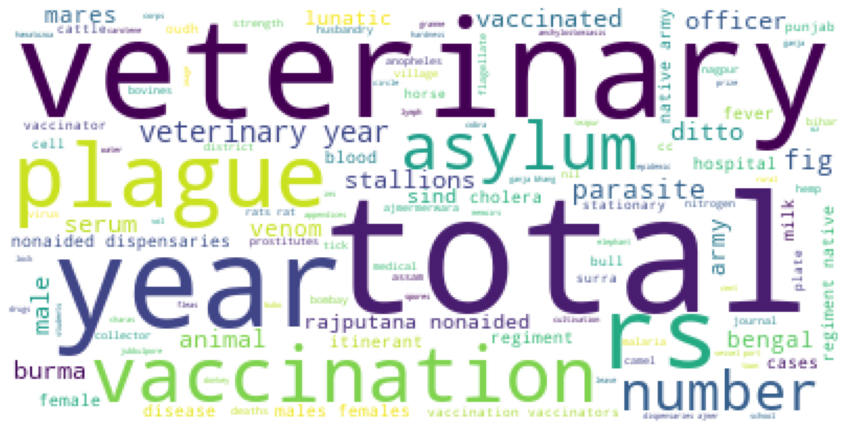

In [14]:
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(str1)
rcParams['figure.figsize'] = 15, 30
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<BarContainer object of 80 artists>

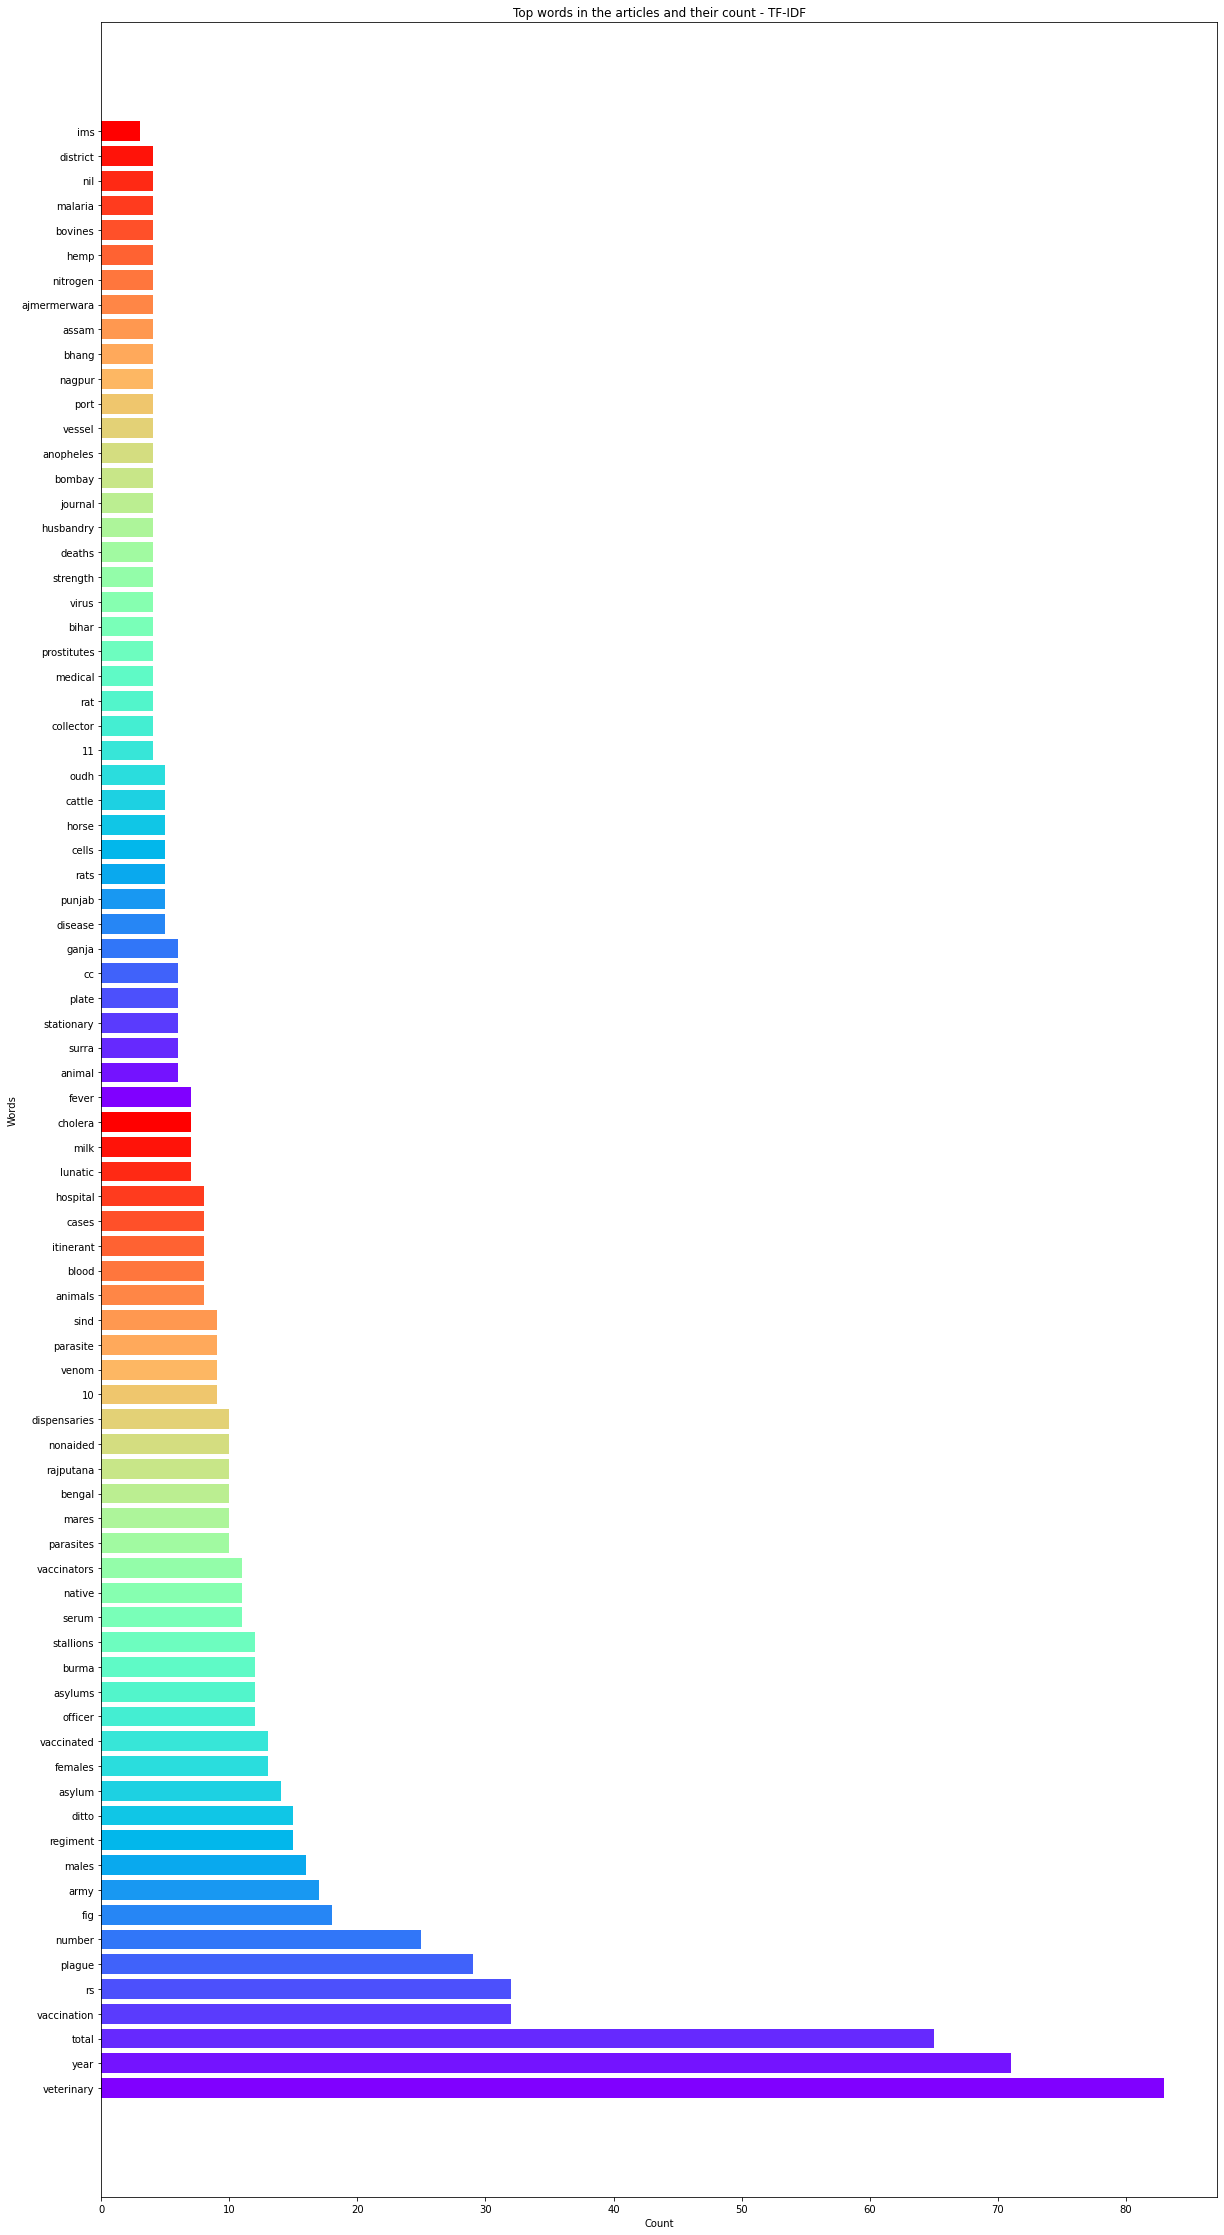

In [15]:
filtered_words = [word for word in str1.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(80):
    words.append(letter)
    counts.append(count)

colors = cm.rainbow(np.linspace(0, 1, 40))
rcParams['figure.figsize'] = 20, 40

plt.title('Top words in the articles and their count - TF-IDF')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)